In [101]:
#Import Libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [103]:
#Import Dataset

In [104]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [105]:
type(X_train)

numpy.ndarray

In [106]:
type(Y_train)

numpy.ndarray

In [107]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [108]:
#Training Data---->60000 images
#Test Data----->10000 images
#Image Dimension---->28 x 28
#Grayscale image---->1 colour channel

In [109]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [110]:
print(X_train[10].shape)

(28, 28)


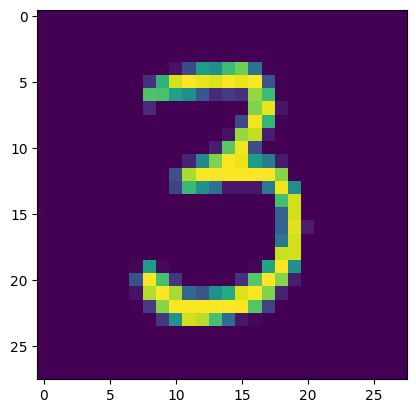

3


In [111]:
#Print the image
plt.imshow(X_train[50])
plt.show()

#Print the label
print(Y_train[50])

In [112]:
#Image Labels

In [113]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [114]:
#Unique Values in Y_train
print(np.unique(Y_train))


#Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


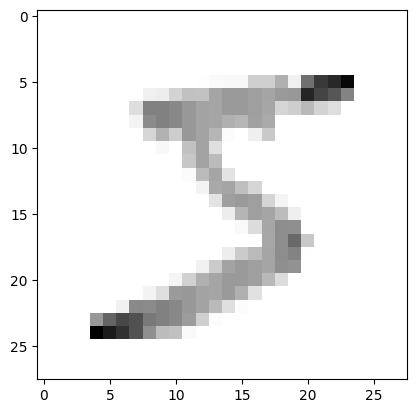

In [115]:
#Normalize the data
X_train=keras.utils.normalize(X_train,axis=1)
X_test=keras.utils.normalize(X_test,axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [116]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [117]:
#Resizing image to make it suitable for apply Convolution Operation

In [118]:
IMG_SIZE=28
X_train=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)  #Increase one dimension for kernel operation
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)  #Increase one dimension for kernel operation
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [119]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [120]:
#Create The CNN Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(10,activation='softmax'))

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

In [122]:
#Compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
#Training Phase

model.fit(X_train,Y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2989 - accuracy: 0.9062 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0989 - accuracy: 0.9719 - val_loss: 0.0912 - val_accuracy: 0.9711
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0699 - accuracy: 0.9795 - val_loss: 0.0702 - val_accuracy: 0.9792
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0577 - val_accuracy: 0.9828
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0621 - val_accuracy: 0.9824
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.0481 - val_accuracy: 0.9872
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0600 - val_accuracy

In [124]:
#Accuracy on Test Data

loss,accuracy=model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9871
0.05388670042157173
0.9871000051498413


In [125]:
print(X_test.shape)

(10000, 28, 28, 1)


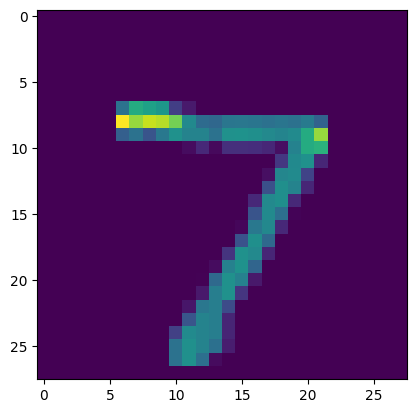

In [126]:
#First image in Test Data

plt.imshow(X_test[0])
plt.show()

In [127]:
print(Y_test[0])

7


In [128]:
Y_pred=model.predict([X_test])

313/313 [==============================] - 1s 3ms/step


In [129]:
print(Y_pred.shape)

(10000, 10)


In [130]:
print(Y_pred[0])

[8.1977040e-17 1.8486875e-10 1.0769116e-10 1.3664107e-11 2.8612157e-15
 3.0092180e-16 4.8097685e-21 1.0000000e+00 8.4545806e-15 4.0814577e-11]


In [131]:
#model.predict() gives prediction probability of each class for that data point

In [132]:
#Converting prediction probabilities to class label
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [133]:
#Converting prediction probabilities to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 4, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [134]:
#Y_test---->True labels
#Y_pred_labels---->Predicted labels

In [135]:
#Confusion Matrix

In [136]:
cm=confusion_matrix(Y_test,Y_pred_labels)

In [137]:
print(cm)

tf.Tensor(
[[ 967    0    1    0    2    0    1    1    3    5]
 [   0 1132    0    0    0    1    1    1    0    0]
 [   2    1 1003    4    8    0    1   10    3    0]
 [   0    0    2 1001    0    4    0    2    1    0]
 [   0    0    0    0  979    0    0    0    1    2]
 [   2    0    0    5    0  880    3    1    0    1]
 [   4    3    0    0    3    2  942    0    4    0]
 [   0    2    7    1    0    1    0 1014    1    2]
 [   0    1    1    1    1    1    0    3  960    6]
 [   0    0    0    1    5    3    1    4    2  993]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

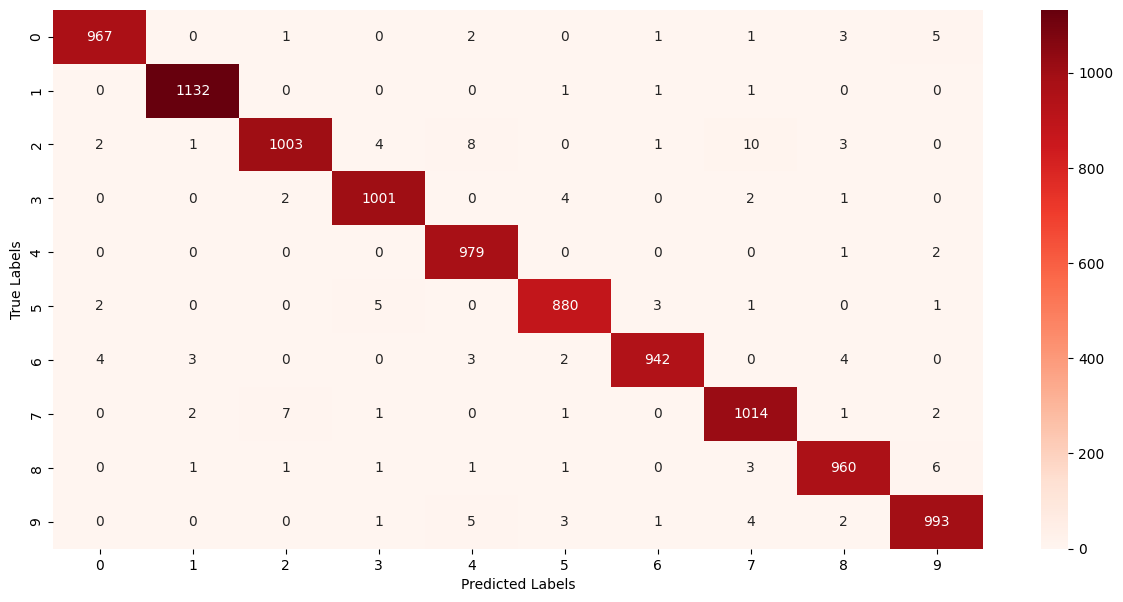

In [138]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [139]:
#Building Predictive System

In [140]:
input_image_path='/content/download.png'
input_image=cv2.imread(input_image_path)

In [141]:
type(input_image)

numpy.ndarray

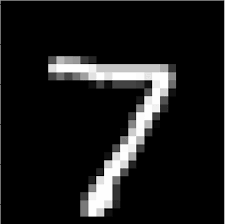

In [142]:
cv2_imshow(input_image)

In [143]:
input_image.shape

(224, 225, 3)

In [144]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [145]:
grayscale.shape

(224, 225)

In [146]:
input_image_resized=cv2.resize(grayscale,(28,28),interpolation=cv2.INTER_AREA)

In [147]:
input_image_resized.shape

(28, 28)

In [148]:
cv2_imshow(input_image_resized)

In [149]:
input_image_nom=keras.utils.normalize(input_image_resized,axis=1)

In [150]:
image_reshaped=np.array(input_image_nom).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [151]:
type(image_reshaped)

numpy.ndarray

In [152]:
image_reshaped.shape

(1, 28, 28, 1)

In [153]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 123ms/step
[[1.7345556e-14 8.6986445e-09 5.0942062e-10 1.7610648e-10 6.9698770e-14
  9.7867481e-14 2.2797735e-18 1.0000000e+00 4.7621651e-13 2.2184219e-09]]


In [154]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

7


In [155]:
tf.keras.models.save_model(model,'Digit.hdf5')